In [83]:
%matplotlib inline

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import re 
import matplotlib.ticker as mtick
import matplotlib as mpl
acs_raw_path = 'data/ACS2015_2019_selVariablesCCA.csv'
cmap_raw_path = 'data/ReferenceCCAProfiles20142018.csv'
df_acs_raw = pd.read_csv(acs_raw_path)

df_cmap_raw = pd.read_csv(cmap_raw_path)

In [85]:
list_cmap = df_cmap_raw.columns.tolist()

In [86]:
stat_cmap = ['EMP','MEDINC','GEOG','IN_LBFRC', 'TOT_POP','WHITE','HISP', 'BLACK','ASIAN','OTHER','MED_AGE']

In [87]:
regex = re.compile('WORK_.+')
regex1 = re.compile('RES_.+')
matches = [i for i in list_cmap if re.match(regex, i)]

In [88]:
matches = matches[1:]
matches

['WORK_NAICS1_TYPE',
 'WORK_NAICS2_TYPE',
 'WORK_NAICS3_TYPE',
 'WORK_NAICS4_TYPE',
 'WORK_NAICS5_TYPE',
 'WORK_NAICS1_COUNT',
 'WORK_NAICS2_COUNT',
 'WORK_NAICS3_COUNT',
 'WORK_NAICS4_COUNT',
 'WORK_NAICS5_COUNT',
 'WORK_CITY1_TYPE',
 'WORK_CITY2_TYPE',
 'WORK_CITY3_TYPE',
 'WORK_CITY4_TYPE',
 'WORK_CITY5_TYPE',
 'WORK_CITY1_COUNT',
 'WORK_CITY2_COUNT',
 'WORK_CITY3_COUNT',
 'WORK_CITY4_COUNT',
 'WORK_CITY5_COUNT']

In [89]:
[matches.append(i) for i in list_cmap if re.match(regex1, i)];

In [90]:
matches = matches[:(len(matches) - 1)]
matches

['WORK_NAICS1_TYPE',
 'WORK_NAICS2_TYPE',
 'WORK_NAICS3_TYPE',
 'WORK_NAICS4_TYPE',
 'WORK_NAICS5_TYPE',
 'WORK_NAICS1_COUNT',
 'WORK_NAICS2_COUNT',
 'WORK_NAICS3_COUNT',
 'WORK_NAICS4_COUNT',
 'WORK_NAICS5_COUNT',
 'WORK_CITY1_TYPE',
 'WORK_CITY2_TYPE',
 'WORK_CITY3_TYPE',
 'WORK_CITY4_TYPE',
 'WORK_CITY5_TYPE',
 'WORK_CITY1_COUNT',
 'WORK_CITY2_COUNT',
 'WORK_CITY3_COUNT',
 'WORK_CITY4_COUNT',
 'WORK_CITY5_COUNT',
 'RES_NAICS1_TYPE',
 'RES_NAICS2_TYPE',
 'RES_NAICS3_TYPE',
 'RES_NAICS4_TYPE',
 'RES_NAICS5_TYPE',
 'RES_NAICS1_COUNT',
 'RES_NAICS2_COUNT',
 'RES_NAICS3_COUNT',
 'RES_NAICS4_COUNT',
 'RES_NAICS5_COUNT',
 'RES_CITY1_TYPE',
 'RES_CITY2_TYPE',
 'RES_CITY3_TYPE',
 'RES_CITY4_TYPE',
 'RES_CITY5_TYPE',
 'RES_CITY1_COUNT',
 'RES_CITY2_COUNT',
 'RES_CITY3_COUNT',
 'RES_CITY4_COUNT',
 'RES_CITY5_COUNT']

In [91]:
cmap_list_final = matches + stat_cmap

In [92]:
type(cmap_list_final)

list

In [93]:
df_cmap_clean = df_cmap_raw[cmap_list_final]

In [94]:
df_cmap_clean.head()

,WORK_NAICS1_TYPE,WORK_NAICS2_TYPE,WORK_NAICS3_TYPE,WORK_NAICS4_TYPE,WORK_NAICS5_TYPE,WORK_NAICS1_COUNT,WORK_NAICS2_COUNT,WORK_NAICS3_COUNT,WORK_NAICS4_COUNT,WORK_NAICS5_COUNT,...,MEDINC,GEOG,IN_LBFRC,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER,MED_AGE
0,Health Care,Retail Trade,Manufacturing,Information,Administration,1014,897,837,515,440,...,59883.04094,Albany Park,27977.999980,50342.99998,16126.999990,22985.999990,2501.999998,7202.999996,1524.999999,34.300953
1,Manufacturing,Transportation,Administration,Retail Trade,Wholesale Trade,2896,1810,1423,859,809,...,44108.84007,Archer Heights,6331.047113,13055.08151,2130.751491,10109.735590,122.840954,647.912525,43.840954,32.654702
2,Accommodation and Food Service,Administration,Health Care,Retail Trade,Arts and Entertainment,1578,976,620,371,278,...,27463.83031,Armour Square,6469.138782,13779.11840,1694.669183,595.520604,1393.301799,10027.626820,68.000000,45.738479
3,Retail Trade,Utilities,Health Care,Manufacturing,Accommodation and Food Service,890,792,762,366,343,...,68463.73500,Ashburn,22511.000000,43985.99999,4423.999999,17303.000000,20913.999990,370.000000,975.000000,35.901153
4,Retail Trade,Accommodation and Food Service,Education,Health Care,Wholesale Trade,650,330,235,202,155,...,34661.22650,Auburn Gresham,20074.000010,45271.00001,362.000000,836.000000,43529.000010,120.000000,424.000000,40.780428


In [95]:
df_cmap_clean.columns

Index(['WORK_NAICS1_TYPE', 'WORK_NAICS2_TYPE', 'WORK_NAICS3_TYPE',
       'WORK_NAICS4_TYPE', 'WORK_NAICS5_TYPE', 'WORK_NAICS1_COUNT',
       'WORK_NAICS2_COUNT', 'WORK_NAICS3_COUNT', 'WORK_NAICS4_COUNT',
       'WORK_NAICS5_COUNT', 'WORK_CITY1_TYPE', 'WORK_CITY2_TYPE',
       'WORK_CITY3_TYPE', 'WORK_CITY4_TYPE', 'WORK_CITY5_TYPE',
       'WORK_CITY1_COUNT', 'WORK_CITY2_COUNT', 'WORK_CITY3_COUNT',
       'WORK_CITY4_COUNT', 'WORK_CITY5_COUNT', 'RES_NAICS1_TYPE',
       'RES_NAICS2_TYPE', 'RES_NAICS3_TYPE', 'RES_NAICS4_TYPE',
       'RES_NAICS5_TYPE', 'RES_NAICS1_COUNT', 'RES_NAICS2_COUNT',
       'RES_NAICS3_COUNT', 'RES_NAICS4_COUNT', 'RES_NAICS5_COUNT',
       'RES_CITY1_TYPE', 'RES_CITY2_TYPE', 'RES_CITY3_TYPE', 'RES_CITY4_TYPE',
       'RES_CITY5_TYPE', 'RES_CITY1_COUNT', 'RES_CITY2_COUNT',
       'RES_CITY3_COUNT', 'RES_CITY4_COUNT', 'RES_CITY5_COUNT', 'EMP',
       'MEDINC', 'GEOG', 'IN_LBFRC', 'TOT_POP', 'WHITE', 'HISP', 'BLACK',
       'ASIAN', 'OTHER', 'MED_AGE'],
      dtype

In [96]:
df_cmap_clean['pct_black'] = df_cmap_clean['BLACK']/df_cmap_clean['TOT_POP']

<ipython-input-96-989b5df06040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmap_clean['pct_black'] = df_cmap_clean['BLACK']/df_cmap_clean['TOT_POP']


In [97]:
df_cmap_clean['GEOG'] = [i.upper() for i in df_cmap_clean['GEOG']]
df_cmap_clean.set_index('GEOG', inplace=True)

<ipython-input-97-daed324fe116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmap_clean['GEOG'] = [i.upper() for i in df_cmap_clean['GEOG']]


In [98]:
df_cmap_clean

,WORK_NAICS1_TYPE,WORK_NAICS2_TYPE,WORK_NAICS3_TYPE,WORK_NAICS4_TYPE,WORK_NAICS5_TYPE,WORK_NAICS1_COUNT,WORK_NAICS2_COUNT,WORK_NAICS3_COUNT,WORK_NAICS4_COUNT,WORK_NAICS5_COUNT,...,MEDINC,IN_LBFRC,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER,MED_AGE,pct_black
GEOG,,,,,,,,,,,,,,,,,,,,,
ALBANY PARK,Health Care,Retail Trade,Manufacturing,Information,Administration,1014,897,837,515,440,...,59883.04094,27977.999980,50342.99998,16126.999990,22985.999990,2501.999998,7202.999996,1524.999999,34.300953,0.049699
ARCHER HEIGHTS,Manufacturing,Transportation,Administration,Retail Trade,Wholesale Trade,2896,1810,1423,859,809,...,44108.84007,6331.047113,13055.08151,2130.751491,10109.735590,122.840954,647.912525,43.840954,32.654702,0.009409
ARMOUR SQUARE,Accommodation and Food Service,Administration,Health Care,Retail Trade,Arts and Entertainment,1578,976,620,371,278,...,27463.83031,6469.138782,13779.11840,1694.669183,595.520604,1393.301799,10027.626820,68.000000,45.738479,0.101117
ASHBURN,Retail Trade,Utilities,Health Care,Manufacturing,Accommodation and Food Service,890,792,762,366,343,...,68463.73500,22511.000000,43985.99999,4423.999999,17303.000000,20913.999990,370.000000,975.000000,35.901153,0.475469
AUBURN GRESHAM,Retail Trade,Accommodation and Food Service,Education,Health Care,Wholesale Trade,650,330,235,202,155,...,34661.22650,20074.000010,45271.00001,362.000000,836.000000,43529.000010,120.000000,424.000000,40.780428,0.961521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST LAWN,Manufacturing,Retail Trade,Administration,Accommodation and Food Service,Education,1981,1193,607,581,547,...,51081.67771,15739.999980,32176.00000,4424.999999,26608.000000,829.999999,224.000000,89.000000,32.340871,0.025796
WEST PULLMAN,Retail Trade,Manufacturing,Health Care,Wholesale Trade,Other Service,291,200,130,127,53,...,41079.19301,13132.882100,27480.06008,185.000000,1569.999999,25318.060080,19.000000,388.000000,36.714160,0.921325
WEST RIDGE,Health Care,Professional,Retail Trade,Accommodation and Food Service,Other Service,5533,1298,1228,826,554,...,52038.56748,38311.000020,77212.00002,32200.000000,14178.000010,10320.000000,16987.000010,3527.000002,35.421417,0.133658


In [99]:
df_cmap_clean.columns.tolist()

['WORK_NAICS1_TYPE',
 'WORK_NAICS2_TYPE',
 'WORK_NAICS3_TYPE',
 'WORK_NAICS4_TYPE',
 'WORK_NAICS5_TYPE',
 'WORK_NAICS1_COUNT',
 'WORK_NAICS2_COUNT',
 'WORK_NAICS3_COUNT',
 'WORK_NAICS4_COUNT',
 'WORK_NAICS5_COUNT',
 'WORK_CITY1_TYPE',
 'WORK_CITY2_TYPE',
 'WORK_CITY3_TYPE',
 'WORK_CITY4_TYPE',
 'WORK_CITY5_TYPE',
 'WORK_CITY1_COUNT',
 'WORK_CITY2_COUNT',
 'WORK_CITY3_COUNT',
 'WORK_CITY4_COUNT',
 'WORK_CITY5_COUNT',
 'RES_NAICS1_TYPE',
 'RES_NAICS2_TYPE',
 'RES_NAICS3_TYPE',
 'RES_NAICS4_TYPE',
 'RES_NAICS5_TYPE',
 'RES_NAICS1_COUNT',
 'RES_NAICS2_COUNT',
 'RES_NAICS3_COUNT',
 'RES_NAICS4_COUNT',
 'RES_NAICS5_COUNT',
 'RES_CITY1_TYPE',
 'RES_CITY2_TYPE',
 'RES_CITY3_TYPE',
 'RES_CITY4_TYPE',
 'RES_CITY5_TYPE',
 'RES_CITY1_COUNT',
 'RES_CITY2_COUNT',
 'RES_CITY3_COUNT',
 'RES_CITY4_COUNT',
 'RES_CITY5_COUNT',
 'EMP',
 'MEDINC',
 'IN_LBFRC',
 'TOT_POP',
 'WHITE',
 'HISP',
 'BLACK',
 'ASIAN',
 'OTHER',
 'MED_AGE',
 'pct_black']

In [100]:
df_cmap_clean['RES_NAICS1_TYPE'].value_counts()

Health Care                       43
Professional                      12
Manufacturing                      8
Education                          6
Accommodation and Food Service     6
Public Administration              2
Name: RES_NAICS1_TYPE, dtype: int64

In [101]:
df_cmap_clean.loc[:,"RES_NAICS1_TYPE":]

,RES_NAICS1_TYPE,RES_NAICS2_TYPE,RES_NAICS3_TYPE,RES_NAICS4_TYPE,RES_NAICS5_TYPE,RES_NAICS1_COUNT,RES_NAICS2_COUNT,RES_NAICS3_COUNT,RES_NAICS4_COUNT,RES_NAICS5_COUNT,...,MEDINC,IN_LBFRC,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER,MED_AGE,pct_black
GEOG,,,,,,,,,,,,,,,,,,,,,
ALBANY PARK,Health Care,Accommodation and Food Service,Retail Trade,Professional,Education,2509,2117,1957,1689,1442,...,59883.04094,27977.999980,50342.99998,16126.999990,22985.999990,2501.999998,7202.999996,1524.999999,34.300953,0.049699
ARCHER HEIGHTS,Manufacturing,Accommodation and Food Service,Administration,Retail Trade,Health Care,659,560,507,463,460,...,44108.84007,6331.047113,13055.08151,2130.751491,10109.735590,122.840954,647.912525,43.840954,32.654702,0.009409
ARMOUR SQUARE,Accommodation and Food Service,Health Care,Retail Trade,Professional,Manufacturing,1115,653,438,391,387,...,27463.83031,6469.138782,13779.11840,1694.669183,595.520604,1393.301799,10027.626820,68.000000,45.738479,0.101117
ASHBURN,Health Care,Education,Retail Trade,Public Administration,Manufacturing,2263,2088,1569,1483,1430,...,68463.73500,22511.000000,43985.99999,4423.999999,17303.000000,20913.999990,370.000000,975.000000,35.901153,0.475469
AUBURN GRESHAM,Health Care,Administration,Retail Trade,Education,Accommodation and Food Service,2840,1706,1498,1338,1335,...,34661.22650,20074.000010,45271.00001,362.000000,836.000000,43529.000010,120.000000,424.000000,40.780428,0.961521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST LAWN,Manufacturing,Accommodation and Food Service,Administration,Retail Trade,Health Care,1564,1289,1229,1205,1117,...,51081.67771,15739.999980,32176.00000,4424.999999,26608.000000,829.999999,224.000000,89.000000,32.340871,0.025796
WEST PULLMAN,Health Care,Administration,Retail Trade,Education,Accommodation and Food Service,1564,932,880,862,789,...,41079.19301,13132.882100,27480.06008,185.000000,1569.999999,25318.060080,19.000000,388.000000,36.714160,0.921325
WEST RIDGE,Health Care,Retail Trade,Accommodation and Food Service,Education,Professional,4903,3089,2805,2385,2186,...,52038.56748,38311.000020,77212.00002,32200.000000,14178.000010,10320.000000,16987.000010,3527.000002,35.421417,0.133658


In [102]:
#[(col ,col.replace("TYPE","COUNT")) for col in df_cmap_clean.columns if "RES_NAICS" in col and "TYPE" in col]

In [103]:
lst_foodserv_df = [df_cmap_clean.loc[df_cmap_clean[col] == "Accommodation and Food Service"].loc[:,[col.replace("TYPE","COUNT"),"MEDINC","EMP"]] for col in df_cmap_clean.columns if "RES_NAICS" in col and "TYPE" in col]

In [104]:
#(df_cmap_clean.loc[df_cmap_clean["RES_NAICS1_TYPE"] == "Accommodation and Food Service"]["RES_NAICS1_COUNT"])

In [105]:
collist = []
concatlist = []
for i in range(5):
    lst_foodserv_df[i]['FOODSERV_RANK'] = i + 1
    foodcountname = f"RES_NAICS{i +1}_COUNT"
    lst_foodserv_df[i]['FOODSERV_JOB_COUNT'] = lst_foodserv_df[i][foodcountname]
    #concatlist.append(f'lst_foodserv_df[{i}]')
    dfname = f"df{i}"
    dfname = lst_foodserv_df[i]
    concatlist.append(dfname)
    collist.append(foodcountname)

In [106]:
df_foodserv = pd.concat(concatlist)

In [107]:
df_foodserv

,RES_NAICS1_COUNT,MEDINC,EMP,FOODSERV_RANK,FOODSERV_JOB_COUNT,RES_NAICS2_COUNT,RES_NAICS3_COUNT,RES_NAICS4_COUNT,RES_NAICS5_COUNT
GEOG,,,,,,,,,
ARMOUR SQUARE,1115.0,27463.83031,5766.881268,1,1115,NaN,NaN,NaN,NaN
AVONDALE,1780.0,60000.00000,20782.000000,1,1780,NaN,NaN,NaN,NaN
BRIDGEPORT,1989.0,50579.58519,17163.118730,1,1989,NaN,NaN,NaN,NaN
LOWER WEST SIDE,1556.0,45204.43925,17760.000010,1,1556,NaN,NaN,NaN,NaN
MCKINLEY PARK,843.0,46112.06896,7507.999997,1,843,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
NORTH CENTER,NaN,115756.17280,21468.999980,5,1412,NaN,NaN,NaN,1412.0
PULLMAN,NaN,42489.58334,3214.999988,5,243,NaN,NaN,NaN,243.0
SOUTH DEERING,NaN,35436.68121,5058.999996,5,470,NaN,NaN,NaN,470.0


In [108]:
df_foodserv = df_foodserv.drop(columns=collist)

In [109]:
df_foodserv['PCT_FOODSERV'] = df_foodserv['FOODSERV_JOB_COUNT']/df_foodserv['MEDINC']

In [110]:
df_foodserv.sort_values(by=['PCT_FOODSERV'])

,MEDINC,EMP,FOODSERV_RANK,FOODSERV_JOB_COUNT,PCT_FOODSERV
GEOG,,,,,
BURNSIDE,25460.52632,882.000002,4,80,0.003142
FULLER PARK,22920.25862,619.353255,4,88,0.003839
PULLMAN,42489.58334,3214.999988,5,243,0.005719
AVALON PARK,43372.93830,3546.562082,5,270,0.006225
MOUNT GREENWOOD,98422.44700,9561.000048,4,669,0.006797
...,...,...,...,...,...
HUMBOLDT PARK,38592.71523,23561.000010,3,2190,0.056746
BELMONT CRAGIN,50767.45194,38393.313270,4,2989,0.058876
SOUTH LAWNDALE,33611.69102,25413.999990,3,2036,0.060574


In [111]:
df_foodserv['MEDINC'].dtype

dtype('float64')

In [112]:
df_foodserv.to_csv("data/food_serv_fin.csv")

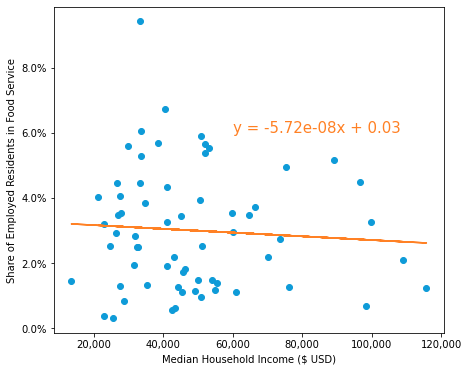

In [169]:
x = np.array(df_foodserv['MEDINC'])
y = np.array(df_foodserv['PCT_FOODSERV'])
fig = plt.figure(1, (7,6))
ax = fig.add_subplot(1,1,1)
m, b = np.polyfit(x, y, 1)
line_eq = "y = " + str(round(m,ndigits=10)) + "x + " + str(round(b,2))
plt.annotate(line_eq,(60000,0.06),fontsize=15,color=(255/255,129/255,37/255))
plt.scatter(x,y,color=(14/255,155/255,216/255))
plt.plot(x, m*x + b,color=(255/255,129/255,37/255))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Median Household Income ($ USD)')
plt.ylabel('Share of Employed Residents in Food Service')
plt.savefig('data/lin_reg')